# Nussinov algorithm

This file allows the execution of the code for the nussinov algorithm. This algo is our introduction into the understanding of the structure prediction. 
We have auxiliary files in which are defined useful functions and variables :
* utilities.py : contains utility functions such as the display or elementary functions
* global_variables.py : contains the global variables that are required throughout the project but needs to be unique.

we tookk inspiration from the ressources available here : https://www.lix.polytechnique.fr/~ponty/enseignement/algo4bio/
In particular the TP2 was useful as it allowed a checking of what we did and helped better define our approach.

## Set up 

In [25]:
import numpy as np
# print(np.__version__)
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

import subprocess
import os


from utilities import *
from global_variables import *


## Main functions

* FillMatrix
* Backtrack

In [26]:
def FillMatrix(sequence, theta = 3, pair_energy = -1):
    """
    Fills the minimum energy matrix

    Args:
        sequence (string): RNA sequence

    Returns:
        matrix of size n*n: minimum energy matrix of the sequence
    """
    print("\n-------------------")
    print("Start of FillMatrix")

    len_seq = len(sequence)
    # ----------- Initialisation of the matrix with zeros -----------
    m = np.zeros((len_seq,len_seq))
    for i in range (len_seq): 
        for j in range (i, min(i + theta, len_seq)) :
            m[i,j] = 0 # this step is unnecessary as we are replacing zeros with zeros but it helps in understanding the algo

    # ----------- Filling the matrix -----------
    for i in range (len_seq-1,-1,-1): # We start with larger subsequences and iteratively calculate smaller ones.
        for j in range (i + theta + 1, len_seq) :
            # Case A : pos i without partner
            m[i,j] = m[i+1,j]

            # Case B : Pos i and j form a base pair
            if can_pair(sequence[i], sequence[j]) :
                m[i,j] = min(m[i,j], m[i+1,j-1] + pair_energy)

            # Case C : pairing with an other base at index k
            for k in range (i + theta + 1, j):
                if can_pair(sequence[i], sequence[k]) :
                    # print("k = ",k)
                    m[i,j] = min(m[i,j], m[i+1,k-1] + m[k+1,j] + pair_energy)

    print("End of FillMatrix")
    print("-------------------\n")
    return m

In [27]:
def Backtrack(i, j, m, sequence, S, theta = 3):
    """
    Finds the minimum energy structure

    Args:
        i (int): Begining of the region under consideration
        j (int): End of the region under consideration
        m (matrix n*n): minimum energy matrix
        sequence (string): RNA sequence of length n

    Returns:
        S*: structure minimizing free energy
    """

    # print("\n-------------------")
    print("\n")
    print("Start of Backtrack")
    print("i = ",i, " j = ",j)
    print(sequence[i] + "       " + sequence[j])

    if j-i <= theta :
        # print("CaseD")
        return
    else :
        # Case A : Position i unpaired
        if m[i,j] == m[i+1,j] :
            print("CaseA")
            Backtrack(i + 1, j, m, sequence, S)
            return 
        # elif m[i,j] == m[i,j-1]: # It also works but gives an other possible structure
        #     Backtrack(i, j-1, m, sequence, S)
        # Case B : Positions i and j form a base pair 
        elif m[i,j] == m[i+1,j-1] + pair_energy and can_pair(sequence[i], sequence[j]) : # il faut ajouter la condition de pairing sinon cela ne fonctionne pas bien que la matrice soit bonne
            print("CaseB")
            S.append((i, j))
            Backtrack(i + 1, j - 1, m, sequence, S)
            return
        # Case C : Position i pairs with an other base k < j
        else :
            for k in range(i + theta + 1, j) :
                if  m[i,j] == m[i+1,k-1] + m[k+1,j] + pair_energy and can_pair(sequence[i], sequence[k]) :
                    print("CaseC")
                    print("Liaison entre les lettres : ", sequence[i], " et ", sequence[k], " aux indices ", i, " et ", k)
                    S.append((i, k))
                    Backtrack(i+1, k-1, m, sequence, S)
                    Backtrack(k + 1, j, m, sequence, S)
                    return

## Main 

In [28]:
if __name__ == "__main__":

    a_sequence = "GCAACUGGCACAAAGGCCUCCUGG"
    len_seq = len(a_sequence)
    print("The RNA sequence : ", a_sequence)
    print("Size of the RNA sequence: ", len_seq)

    m = FillMatrix(a_sequence)
    print("Minimum energy matrix:")
    print_matrix(m, a_sequence)

    S = []
    Backtrack(0, len_seq-1, m, a_sequence, S, theta = 3)
    print("The optimal pairing :", S)
    structure = displaySS(S,len_seq)
    print(structure)

The RNA sequence :  GCAACUGGCACAAAGGCCUCCUGG
Size of the RNA sequence:  24

-------------------
Start of FillMatrix
End of FillMatrix
-------------------

Minimum energy matrix:
      G   C   A   A   C   U   G   G   C   A   C   A   A   A   G   G   C   C   U   C   C   U   G   G
  G   0   0   0   0  -1  -1  -1  -1  -2  -2  -2  -3  -3  -3  -3  -4  -5  -5  -5  -6  -6  -6  -7  -7 
  C   0   0   0   0   0   0  -1  -1  -1  -1  -1  -2  -2  -2  -3  -4  -4  -4  -5  -5  -5  -6  -7  -7 
  A   0   0   0   0   0   0   0   0   0  -1  -1  -2  -2  -2  -3  -3  -3  -4  -5  -5  -5  -6  -6  -6 
  A   0   0   0   0   0   0   0   0   0  -1  -1  -2  -2  -2  -3  -3  -3  -4  -5  -5  -5  -5  -6  -6 
  C   0   0   0   0   0   0   0   0   0  -1  -1  -2  -2  -2  -3  -3  -3  -4  -4  -4  -4  -5  -6  -6 
  U   0   0   0   0   0   0   0   0   0  -1  -1  -2  -2  -2  -2  -2  -3  -4  -4  -4  -4  -5  -5  -6 
  G   0   0   0   0   0   0   0   0   0   0  -1  -1  -1  -1  -1  -2  -3  -4  -4  -4  -4  -4  -5  -5 
  G   0   0   0

In [29]:
import subprocess

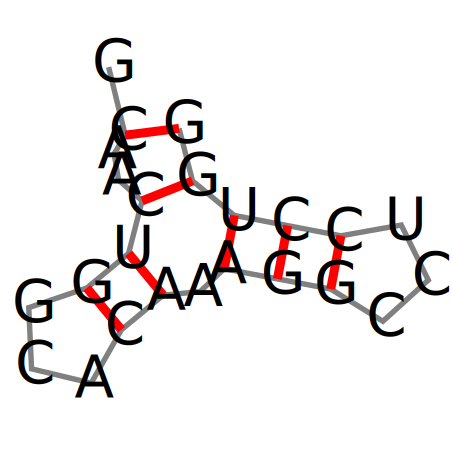

In [30]:
import RNA
from IPython.display import SVG

RNA.svg_rna_plot(a_sequence, structure=structure, ssfile="rna_ss.svg")
SVG("rna_ss.svg")

In [31]:
from IPython.display import SVG

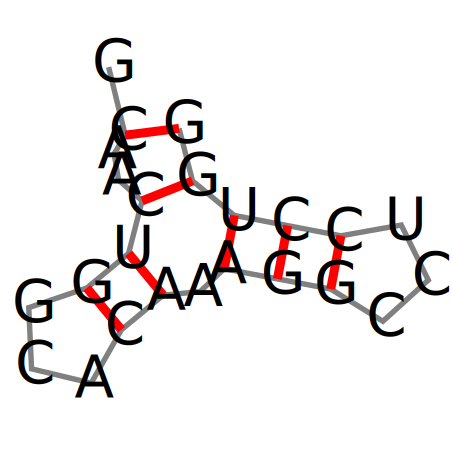

In [33]:
SVG(filename="rna_ss.svg")